In [65]:
#-	Menginstal dan memastikan adanya library matplotlib, wordcloud, NLTK, dan textblob

In [66]:
!pip install matplotlib wordcloud nltk textblob

In [67]:
#	Mengimport library

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
import nltk


In [69]:
#	Mendownload data NLTK

In [70]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Lenovo
[nltk_data]     Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
#-	Input teks

In [72]:
text = """
Long long time ago, in England in Sherwood Forest lived Robin Hood. 
When he was a boy , he had been cheated by a few noblemen. 
Since then he had decided that he would rob the rich and give what he got to the poor.
The Sheriff of Nottingham had made an advertisement that he would give many rewards for the capture of Robin Hood, nobody had ever caught him. 
It was because Robin Hood had a number of friends who served him. They acted as informers. 
When the Sheriff had any plan to catch him, they would warn Robin Hood.
Many rich people were scared of going through Sherwood Forest because they knew that Robin Hood would attack them. 
The Sheriff couldnâ€™t stand it anymore. 
Then he went to ask for the kingâ€™s help. 
However, the king refused to send any of his men to help in the capture of Robbin Hood.
One day The Sheriff and the noblemen held a competition to choose the best shooter in Nottingham. 
It was for capturing Robin Hood. 
Robin Hood was an excellent shooter. 
Therefore, Robin Hood would participate in the competition to prove that he was the best. 
He had been warned by his servant, but Robin wasnâ€™t willing to listen.
The competition began. 
William, The Sheriff man, and the man in green were trying for the first prize. 
it was time for the last arrow to be shot. 
The winner of this round would be declared the best shooter in Nottingham. 
William could shot very close to the center. 
Then the man in greenâ€™s turn made the crowd cheer hysterically. 
His arrow went through Williamâ€™s arrows and the center of the target. 
Then he shot two more arrows towards the chair on which the Sheriff sat. 
No doubt that the man in green was Robin Hood. 
immediately Robin Hood pulled of his black wig and then jumped over a wall onto his waiting horse and was gone. 
The Sheriff shouted to his men to catch him, but it was to late. 
Robin Hood escaped successfully.
"""

In [73]:
#-	Pre-processing data
# menghilangkan kata kata umum yang kurang memiliki arti, seperti kata hubung, 5W1H, dan sebagainya. 
# sehingga, tidak merusak wordcloud dan hasil pencarian kata yang sering digunakan

In [74]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


In [75]:
cleaned_tokens = clean_text(text)


In [76]:
#	Membuat wordcloud

In [77]:
wordcloud = WordCloud(width=800, height=400, background_color='aqua').generate(' '.join(cleaned_tokens))


In [78]:
# -	Menampilkan wordcloudnya

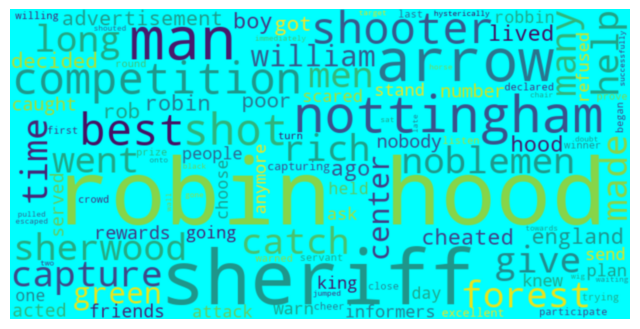

In [79]:
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()


In [80]:
#-	Menghitung frekuensi kata yang muncul

In [81]:
word_freq = Counter(cleaned_tokens)
common_words = word_freq.most_common(5)
words, frequencies = zip(*common_words)


In [82]:
#-	Menampilkan grafiknya

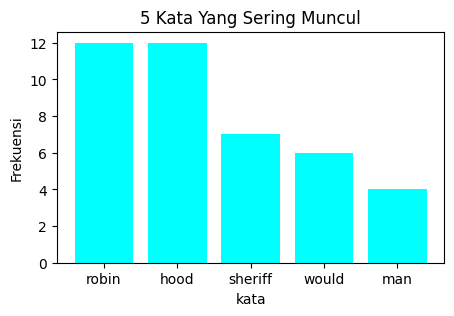

In [83]:
plt.figure(figsize=(5, 3))
plt.bar(words, frequencies, color='aqua')
plt.xlabel('kata')
plt.ylabel('Frekuensi')
plt.title('5 Kata Yang Sering Muncul')
plt.show()


In [84]:
#  Menganalisis sentimen pada teks

In [85]:
blob = TextBlob(text)
sentiment = blob.sentiment
print(f'Sentiment Analysis:\nPolarity: {sentiment.polarity}\nSubjectivity: {sentiment.subjectivity}')


Sentiment Analysis:
Polarity: 0.18205128205128204
Subjectivity: 0.46282051282051273


In [86]:
#	Menampilkan grafiknya

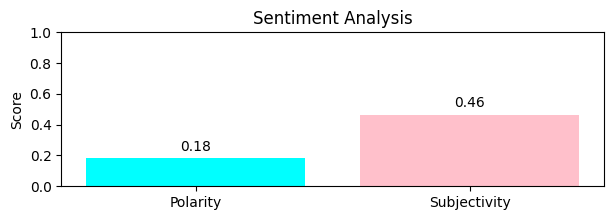

In [87]:
fig, ax = plt.subplots(figsize=(7, 2))

categories = ['Polarity', 'Subjectivity']
values = [sentiment.polarity, sentiment.subjectivity]

ax.bar(categories, values, color=['aqua', 'pink'])
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Sentiment Analysis')

for i, v in enumerate(values):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.show()
